In [107]:
# imports, filenames, load main dataframe
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
datafile = "DSI_kickstarterscrape_dataset.csv"
data = pd.read_csv(datafile, encoding='cp850')
col_list = list(data)

In [5]:
# keep for df analysis
col_list

['project id',
 'name',
 'url',
 'category',
 'subcategory',
 'location',
 'status',
 'goal',
 'pledged',
 'funded percentage',
 'backers',
 'funded date',
 'levels',
 'reward levels',
 'updates',
 'comments',
 'duration']

In [17]:
# keep for df analysis
data['category'].unique()
data['subcategory'].unique()

array(['Short Film', 'Board & Card Games', 'Animation', 'Documentary',
       'Fashion', 'Music', 'Illustration', 'Film & Video',
       'Open Software', 'Indie Rock', 'Dance', 'Fiction', 'Nonfiction',
       'Theater', 'Games', 'Art Book', 'Country & Folk', 'Comics',
       'Webseries', 'Technology', 'Performance Art', 'Narrative Film',
       'Video Games', 'Product Design', 'Rock', 'Painting', 'Photography',
       'Conceptual Art', 'Jazz', 'Open Hardware', 'Classical Music',
       'Food', 'Art', 'Pop', 'Journalism', 'Poetry', 'Electronic Music',
       'World Music', 'Sculpture', 'Publishing', "Children's Book",
       'Public Art', 'Mixed Media', 'Graphic Design', 'Hip-Hop',
       'Periodical', 'Crafts', 'Design', 'Digital Art'], dtype=object)

In [19]:
# cleanup names
data.replace(to_replace='Board &amp; Card Games', value='Board & Card Games', inplace=True)
data.replace(to_replace='Country &amp; Folk', value='Country & Folk', inplace=True)
data.replace(to_replace='Film &amp; Video', value='Film & Video', inplace=True)

In [20]:
#Q1 What is the mean (total) pledge that projects get? (not per backer) *
projects = data['project id'].nunique()
groupedtotals = data['pledged'].sum()
print(groupedtotals / projects)

4994.88254938339


backers    87.331232
dtype: float64

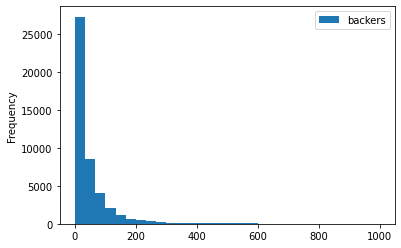

In [22]:
#Q2 Create a histogram that shows the distribution for number of backers. What is the skew of the distribution? *
backers = data.groupby(['project id']).agg({'backers':'sum'})
backers[backers <= 1000].plot.hist(bins=30)
backers.skew()

<AxesSubplot:ylabel='Frequency'>

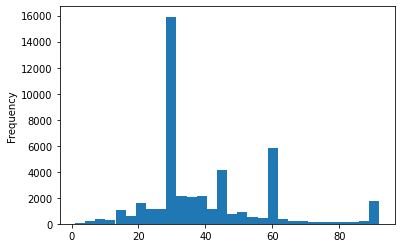

In [34]:
#Q3 Is the ‘duration’ variable normally distributed?
data['duration'].plot.hist(bins=30)

In [26]:
#Q4 If you could collect data on another attribute of these projects, what would it be and why?

In [62]:
# remove outliers in funded percentage beyond 3000% success
data['funded percentage'] = np.where((data['funded percentage'] > 3000),0,data['funded percentage'])

In [80]:
# locate missing values and eliminate
data.info()
# doesn't look like much is missing thats worth eliminating

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   project id         45957 non-null  int64  
 1   name               45957 non-null  object 
 2   url                45957 non-null  object 
 3   category           45957 non-null  object 
 4   subcategory        45957 non-null  object 
 5   location           44635 non-null  object 
 6   status             45957 non-null  object 
 7   goal               45957 non-null  float64
 8   pledged            45945 non-null  float64
 9   funded percentage  45957 non-null  float64
 10  backers            45957 non-null  int64  
 11  funded date        45957 non-null  object 
 12  levels             45957 non-null  int64  
 13  reward levels      45898 non-null  object 
 14  updates            45957 non-null  int64  
 15  comments           45957 non-null  int64  
 16  duration           459

In [82]:
data['funded date']

0        Fri, 19 Aug 2011 19:28:17 -0000
1        Mon, 02 Aug 2010 03:59:00 -0000
2        Fri, 08 Jun 2012 00:00:31 -0000
3        Sun, 08 Apr 2012 02:14:00 -0000
4        Wed, 01 Jun 2011 15:25:39 -0000
                      ...               
45952    Fri, 30 Mar 2012 13:57:00 -0000
45953    Sun, 22 Apr 2012 02:12:10 -0000
45954    Mon, 16 Jan 2012 05:00:00 -0000
45955    Sat, 19 May 2012 19:44:47 -0000
45956    Thu, 04 Aug 2011 04:30:00 -0000
Name: funded date, Length: 45957, dtype: object

In [90]:
import datetime
data['funded date'] = data['funded date'].apply(lambda x:datetime.datetime.strptime(x,'%a, %d %b %Y %H:%M:%S -0000'))

TypeError: strptime() argument 1 must be str, not Timestamp

In [93]:
data['funded date']

0       2011-08-19 19:28:17
1       2010-08-02 03:59:00
2       2012-06-08 00:00:31
3       2012-04-08 02:14:00
4       2011-06-01 15:25:39
                ...        
45952   2012-03-30 13:57:00
45953   2012-04-22 02:12:10
45954   2012-01-16 05:00:00
45955   2012-05-19 19:44:47
45956   2011-08-04 04:30:00
Name: funded date, Length: 45957, dtype: datetime64[ns]

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   project id         45957 non-null  int64         
 1   name               45957 non-null  object        
 2   url                45957 non-null  object        
 3   category           45957 non-null  object        
 4   subcategory        45957 non-null  object        
 5   location           44635 non-null  object        
 6   status             45957 non-null  object        
 7   goal               45957 non-null  float64       
 8   pledged            45945 non-null  float64       
 9   funded percentage  45957 non-null  float64       
 10  backers            45957 non-null  int64         
 11  funded date        45957 non-null  datetime64[ns]
 12  levels             45957 non-null  int64         
 13  reward levels      45898 non-null  object        
 14  update

<AxesSubplot:xlabel='goal'>

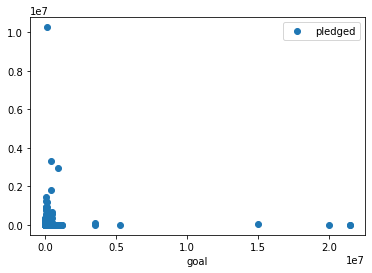

In [236]:
# plot duration vs. funded percentage
clength = data[['pledged','goal']]
clength.plot(x='goal', y='pledged',style='o')

In [101]:
data['status'].unique()

array(['successful', 'failed', 'live', 'canceled', 'suspended'],
      dtype=object)

In [144]:
xyz = data[data['status'] == 'successful'].copy()

In [145]:
print(id(data),id(xyz))
print(type(xyz),type(data))

2455314084384 2456318115504
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [189]:
#cleaning data
xyz.drop(xyz[xyz['duration'] > 65].index, inplace=True)
xyz.shape

(21650, 17)

In [253]:
data['duration'] = data['duration'].astype(int)

In [255]:
data['duration']

0        30
1        47
2        28
3        32
4        30
         ..
45952    37
45953    59
45954    27
45955    30
45956    40
Name: duration, Length: 45957, dtype: int32

In [261]:
#function rcvd from pythonhelp
data['start date'] = data.apply(lambda x: x['funded date'] - datetime.timedelta(x['duration']), axis=1)


In [267]:
data['start month'] = pd.DatetimeIndex(data['start date']).month

In [270]:
import calendar
data['start month'] = data['start month'].apply(lambda x: calendar.month_abbr[x])

In [271]:
data[['start date','funded date','duration','start month']]

,start date,funded date,duration,start month
0,2011-07-20 19:28:17,2011-08-19 19:28:17,30,Jul
1,2010-06-16 03:59:00,2010-08-02 03:59:00,47,Jun
2,2012-05-11 00:00:31,2012-06-08 00:00:31,28,May
3,2012-03-07 02:14:00,2012-04-08 02:14:00,32,Mar
4,2011-05-02 15:25:39,2011-06-01 15:25:39,30,May
...,...,...,...,...
45952,2012-02-22 13:57:00,2012-03-30 13:57:00,37,Feb
45953,2012-02-23 02:12:10,2012-04-22 02:12:10,59,Feb
45954,2011-12-20 05:00:00,2012-01-16 05:00:00,27,Dec
45955,2012-04-19 19:44:47,2012-05-19 19:44:47,30,Apr


In [224]:
data[data['goal'] < 10000].shape

(34503, 17)

In [292]:
#fig = px.bar(xyz,x='category',y='pledged', title='Capital Raised by Size of Goal')
fig = px.histogram(data, x='backers', y='pledged', title='Backers')
fig.show()